In [2]:
#데이터 준비하기 
import pandas as pd
train_data = pd.read_csv("E:\데이콘\\전복나이 예측\\데이터\\train.csv")

train_max_input = train_data.drop(['id', 'Target'], axis=1)
train_max_target = train_data['Target']
#train_max_input = pd.get_dummies(train_max_input).to_numpy()
ques_data = pd.read_csv("E:\데이콘\\전복나이 예측\\데이터\\test.csv")
ques_input = ques_data.drop(['id'], axis=1)
#ques_input = pd.get_dummies(ques_input).to_numpy()


In [3]:
print(type(train_max_input))
print(type(train_max_target))
print(type(ques_input))
print(train_max_input.to_numpy())
print(train_max_input.columns)
print(train_max_input['Gender']=='M')

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
[['M' 0.605 0.47 ... 0.3925 0.291 0.31]
 ['I' 0.43 0.315 ... 0.175 0.08 0.1045]
 ['I' 0.58 0.49 ... 0.5305 0.254 0.41]
 ...
 ['F' 0.525 0.41 ... 0.416 0.163 0.18]
 ['F' 0.445 0.335 ... 0.2025 0.1095 0.1195]
 ['F' 0.75 0.55 ... 0.83 0.366 0.44]]
Index(['Gender', 'Lenght', 'Diameter', 'Height', 'Whole Weight',
       'Shucked Weight', 'Viscra Weight', 'Shell Weight'],
      dtype='object')
0        True
1       False
2       False
3        True
4       False
        ...  
1248    False
1249    False
1250    False
1251    False
1252    False
Name: Gender, Length: 1253, dtype: bool


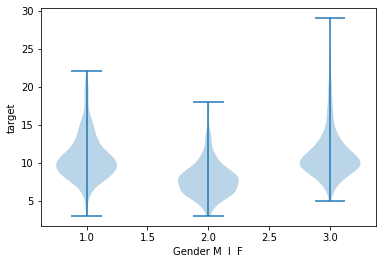

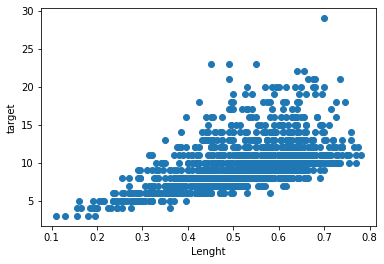

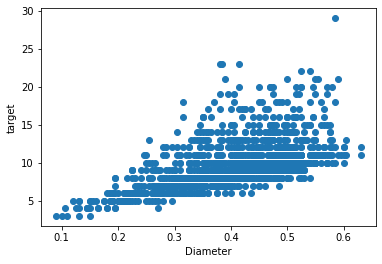

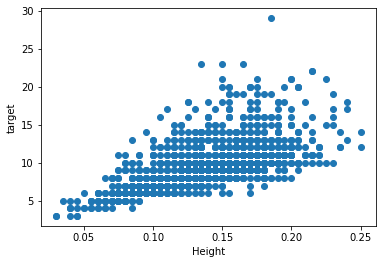

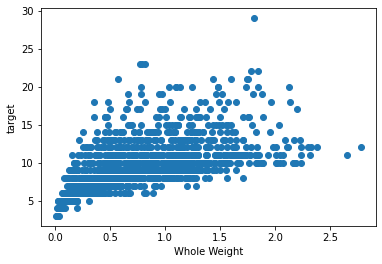

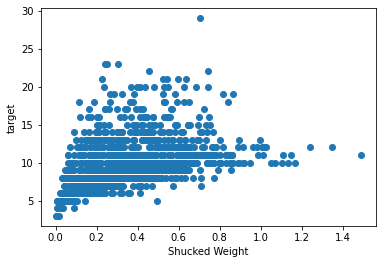

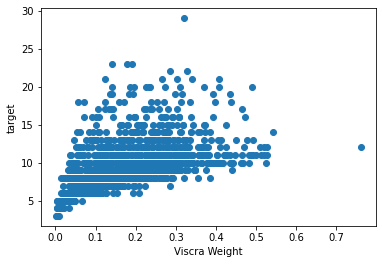

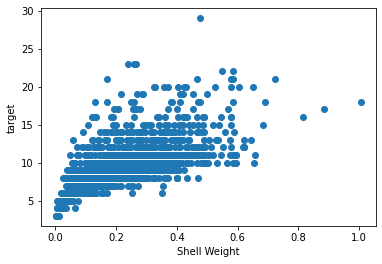

In [4]:
import matplotlib.pyplot as plt
i=1
for column in train_max_input.columns:
    if column == 'Gender':
        plt.violinplot([train_max_target[train_max_input[column]=='M'],train_max_target[train_max_input[column]=='I'],train_max_target[train_max_input[column]=='F']])
        plt.xlabel("Gender M  I  F")
        plt.ylabel('target')
        plt.show()
    else:
        plt.scatter(train_max_input[column],train_max_target)
        plt.xlabel(column)
        plt.ylabel('target')
        plt.show()

30에 가까운 값 제거 하고 15살 이상 오버 샘플링 필요 한거 같음.

827
350
76


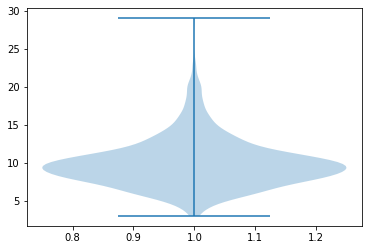

In [5]:
import numpy as np
print(np.sum(train_max_target<=10))
print(np.sum(train_max_target<=15) -np.sum(train_max_target<=10) )
print(np.sum(15<train_max_target))
plt.violinplot(train_max_target)
plt.show()


In [6]:
print(train_max_input[train_max_target>28])

    Gender  Lenght  Diameter  Height  Whole Weight  Shucked Weight  \
762      F     0.7     0.585   0.185        1.8075          0.7055   

     Viscra Weight  Shell Weight  
762         0.3215         0.475  


In [7]:

print(train_max_input.shape)
#train_max_input.drop(index = [train_max_target>25], axis = 0)
train_max_input[train_max_target>25]
train_max_input.drop(index=762,axis =0,inplace= True)
train_max_target.drop(index=762,axis =0,inplace= True)
print(train_max_input.shape)
print(train_max_target.shape)


(1253, 8)
(1252, 8)
(1252,)


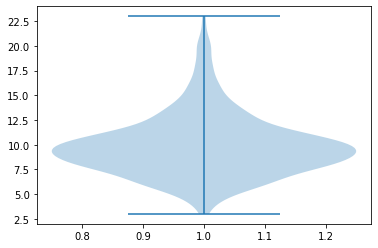

In [8]:
plt.violinplot(train_max_target)
plt.show()


In [9]:
print(np.sum(train_max_target<=5))
print(np.sum(train_max_target<=13) -np.sum(train_max_target<=5) )
print(np.sum(13<train_max_target))

56
1053
143


5보다 작은거랑 13보다 큰거 오버 샘플링 하겠음

In [10]:
T_range = []
for i in train_max_target:
    if i<=5 :
        T_range.append(1)
    elif i <=9:
        T_range.append(2)
    elif i<=13:
        T_range.append(3)
    else:
        T_range.append(4)


In [11]:
T_range =np.array(T_range)
print(T_range)

[4 2 4 ... 2 2 3]


[56, 569, 484, 143]


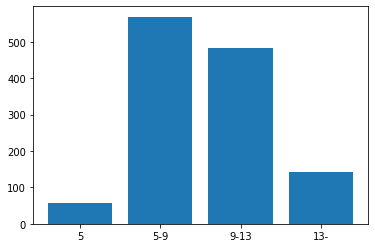

In [12]:

T_range_x = ['5','5-9','9-13','13-']
T_range_y =[np.sum(T_range==1),np.sum(T_range==2),np.sum(T_range==3),np.sum(T_range==4)]
print(T_range_y)
plt.bar(T_range_x,T_range_y)
plt.show()

In [13]:
print(type(train_max_target))

<class 'pandas.core.series.Series'>


In [14]:
train_T1 =train_max_input[T_range==1]
train_T4 = train_max_input[T_range==4]
train_target_T1 =train_max_target[T_range==1]
train_target_T4 =train_max_target[T_range==4]
for i in range(0,7):
    train_max_input = pd.concat([train_max_input,train_T1],axis=0)
    train_max_target =pd.concat([train_max_target,train_target_T1])
for i in range(0,2):
    train_max_input =pd.concat([train_max_input,train_T4],axis=0)
    train_max_target =pd.concat([train_max_target,train_target_T4])
print(train_max_input.shape)
print(train_max_input)
    
    

(1930, 8)
     Gender  Lenght  Diameter  Height  Whole Weight  Shucked Weight  \
0         M   0.605     0.470   0.115        1.1140          0.3925   
1         I   0.430     0.315   0.095        0.3780          0.1750   
2         I   0.580     0.490   0.195        1.3165          0.5305   
3         M   0.535     0.405   0.175        1.2705          0.5480   
4         I   0.310     0.235   0.090        0.1270          0.0480   
...     ...     ...       ...     ...           ...             ...   
1224      M   0.585     0.465   0.190        1.1710          0.3905   
1233      M   0.570     0.450   0.155        0.9100          0.3260   
1234      F   0.490     0.385   0.150        0.7865          0.2410   
1237      F   0.515     0.425   0.140        0.7660          0.3040   
1246      M   0.500     0.385   0.145        0.7615          0.2460   

      Viscra Weight  Shell Weight  
0            0.2910        0.3100  
1            0.0800        0.1045  
2            0.2540        0.

[448, 569, 484, 429]


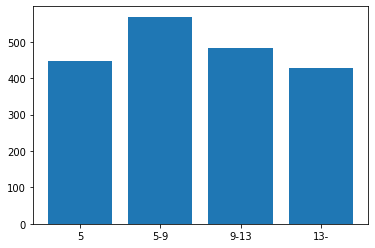

In [15]:
T_range = []
for i in train_max_target:
    if i<=5 :
        T_range.append(1)
    elif i <=9:
        T_range.append(2)
    elif i<=13:
        T_range.append(3)
    else:
        T_range.append(4)

T_range =np.array(T_range)
T_range_x = ['5','5-9','9-13','13-']
T_range_y =[np.sum(T_range==1),np.sum(T_range==2),np.sum(T_range==3),np.sum(T_range==4)]
print(T_range_y)
plt.bar(T_range_x,T_range_y)
plt.show()

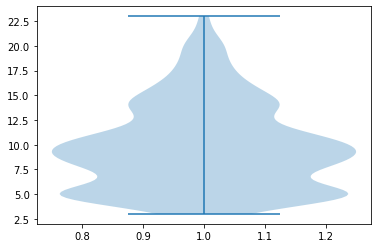

In [16]:
plt.violinplot(train_max_target)
plt.show()

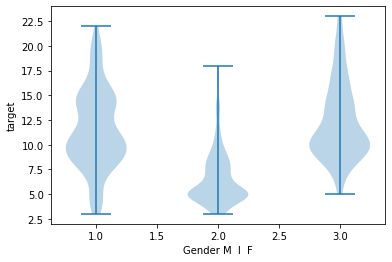

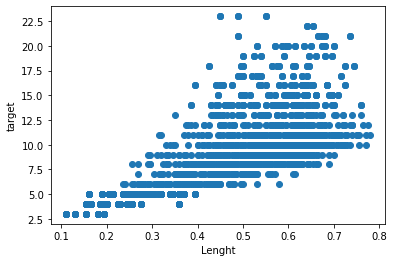

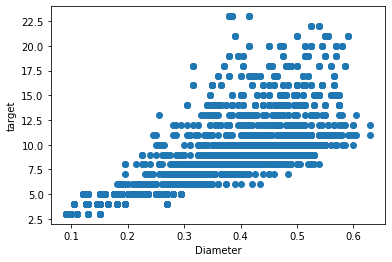

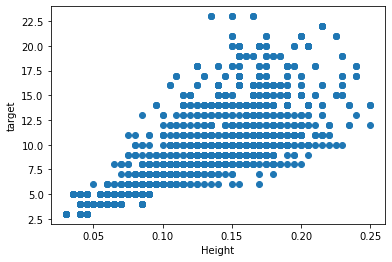

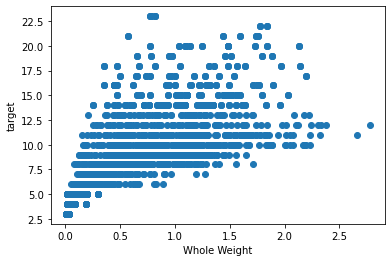

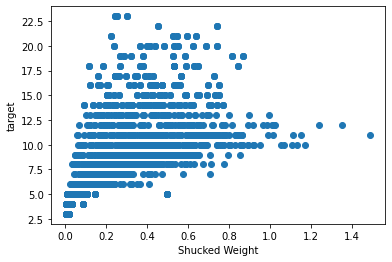

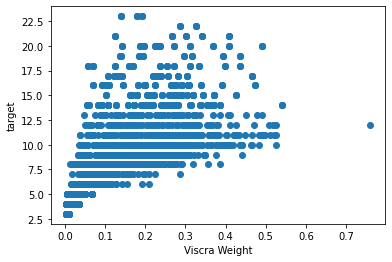

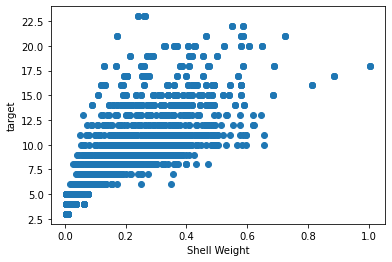

In [17]:
import matplotlib.pyplot as plt
i=1
for column in train_max_input.columns:
    if column == 'Gender':
        plt.violinplot([train_max_target[train_max_input[column]=='M'],train_max_target[train_max_input[column]=='I'],train_max_target[train_max_input[column]=='F']])
        plt.xlabel("Gender M  I  F")
        plt.ylabel('target')
        plt.show()
    else:
        plt.scatter(train_max_input[column],train_max_target)
        plt.xlabel(column)
        plt.ylabel('target')
        plt.show()

In [18]:
train_I_input = train_max_input[train_max_input['Gender']=='I']
train_I_target = train_max_target[train_max_input['Gender']=='I']

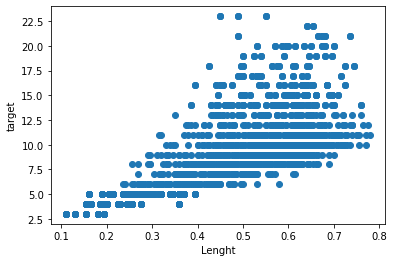

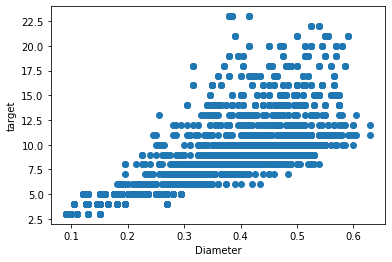

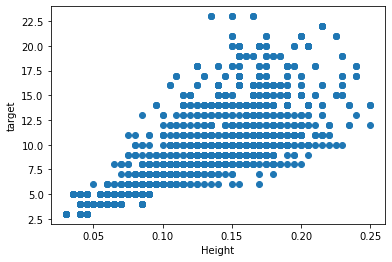

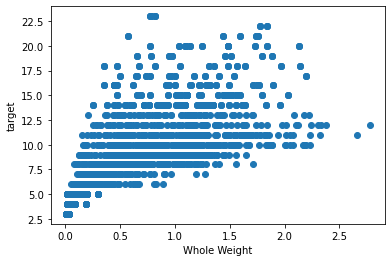

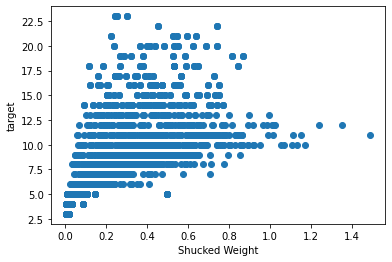

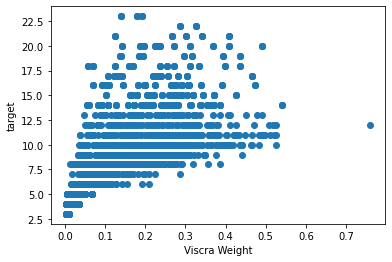

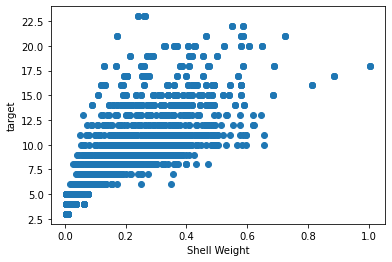

In [19]:
import matplotlib.pyplot as plt
i=1
for column in train_I_input.columns:
    if column == 'Gender':
        pass
    else:
        plt.scatter(train_max_input[column],train_max_target)
        plt.xlabel(column)
        plt.ylabel('target')
        plt.show()